<a href="https://colab.research.google.com/github/yonghwadragon/DataScience_MidCourse_12_22/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4_%EC%A4%91%EA%B8%89_12_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

eda실제 데이터 분석 및 클러스터링 알고리즘 비교

오차 = 바이어스 + 배리언스\
바이어스가 높으면 \
배리언스가 높은 형태(오버피팅)(새로운거 예측성능 떨어짐)\
모여있느거랑 잘쏜거랑 흩어져있는 거 4가지 이었는데

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# kslearn에서 당뇨병 데이터셋 로드
diabetes_data = datasets.load_diabetes()

#데이터셋을 dataframe을 변환
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

#절편(intercept)을 위한 상수 추가
X=sm.add_constant(df.drop('target', axis=1))
y=df['target']

In [ ]:
# 렛지 파라미터(람다) 설정
lambda_ridge=1.0

#OLS 모델에 L2 패널티 항(릿지) 추가
ridge_regression = sm.OLS(y,X).fit_regularized(L1_wt=0, alpha=lambda_ridge)

#회귀 계수 출력
ridge_regression.params

array([76.06674208,  0.68055113,  0.15179605,  2.13470867,  1.60568125,
        0.7659184 ,  0.62686438, -1.4346041 ,  1.56130432,  2.05772026,
        1.38848176])

In [ ]:
# 릿지 회귀를 위한 Lambda 값들 설정
lambda_values = np.logspace(-2,4,100)

# 각 Lambda에 대한 회귀 계수를 저장할 리스트
coefficients=[]

# 각 Lambd 값에 대해 릿지 회수 수행 및 회귀 계수 저장
for l in lambda_values:
  ridge_regression=sm.OLS(y,X).fit_regularized(L1_wt=0, alpha=l)
  # params 속성을 사용하여 회귀 계수 가져오기
  coefficients.append(ridge_regression.params)

# 회귀 계수를 numpy 배열로 변환
coefficients = np.array(coefficients)

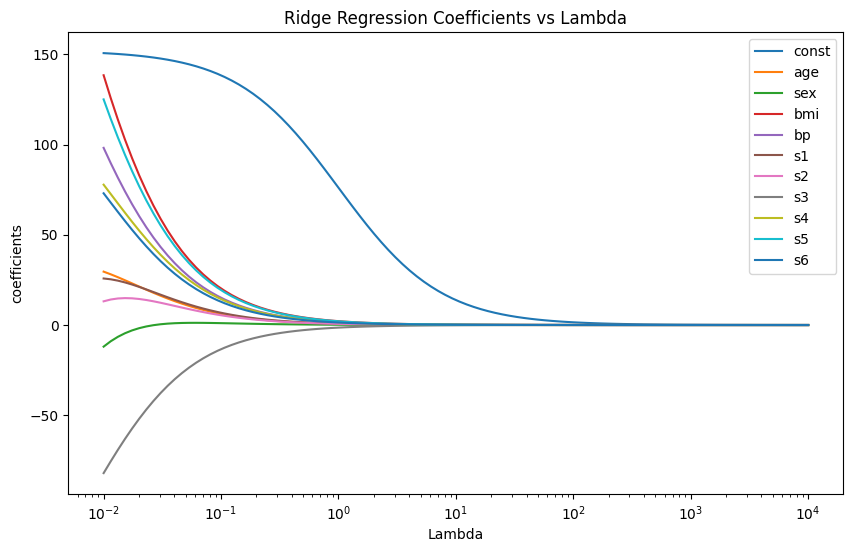

In [ ]:
# 그래프그리기
plt.figure(figsize=(10,6))
for i in range(coefficients.shape[1]):
  plt.plot(lambda_values,coefficients[:,i], label=X.columns[i])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('coefficients')
plt.title('Ridge Regression Coefficients vs Lambda')
plt.legend()
plt.show()

# Regularization

In [ ]:
# Lasso Regularization을 위한 Lambda 값 설정
lambda_lasso=1.0

# Lasso Regularization 수행 및 회귀 계수 지정
lasso_regression = sm.OLS(y,X).fit_regularized(L1_wt=1, alpha=lambda_lasso)

#회귀 계수 출력
lasso_coefficients = lasso_regression.params
lasso_coefficients

const    151.133484
age        0.000000
sex        0.000000
bmi      367.701626
bp         6.309703
s1         0.000000
s2         0.000000
s3         0.000000
s4         0.000000
s5       307.602147
s6         0.000000
dtype: float64

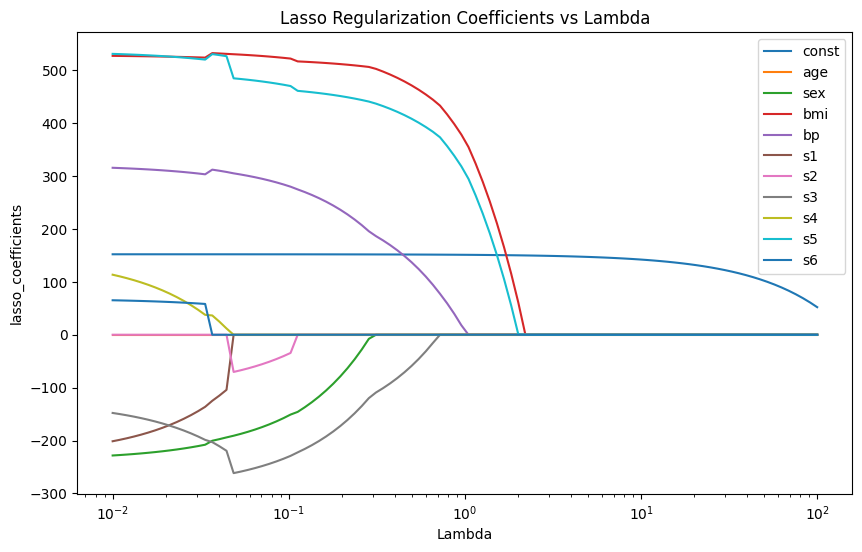

In [ ]:
# Lasso Regularization을 위한 다양한 labda 값 설정
lambda_lasso_values = np.logspace(-2,2,100)

# 각 Lambda에 대한 회귀 계수를 저장할 리스트
lasso_coefficients=[]

# 각 Lambd 값에 대해 Lasso Regularization 수행 및 회귀 계수 저장
for l in lambda_lasso_values:
  lasso_regression=sm.OLS(y,X).fit_regularized(L1_wt=1, alpha=l)
  # params 속성을 사용하여 회귀 계수 가져오기
  lasso_coefficients.append(lasso_regression.params)

# 회귀 계수를 numpy 배열로 변환
lasso_coefficients = np.array(lasso_coefficients)

# 그래프그리기
plt.figure(figsize=(10,6))
for i in range(lasso_coefficients.shape[1]):
  plt.plot(lambda_lasso_values,lasso_coefficients[:,i], label=X.columns[i])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('lasso_coefficients')
plt.title('Lasso Regularization Coefficients vs Lambda')
plt.legend()
plt.show()

#DT(디시젼 트리)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Iris 데이터셋 로드
iris = datasets.load_iris()
X=iris.data
y=iris.target
feature_names = iris.feature_names
class_names = iris.target_names

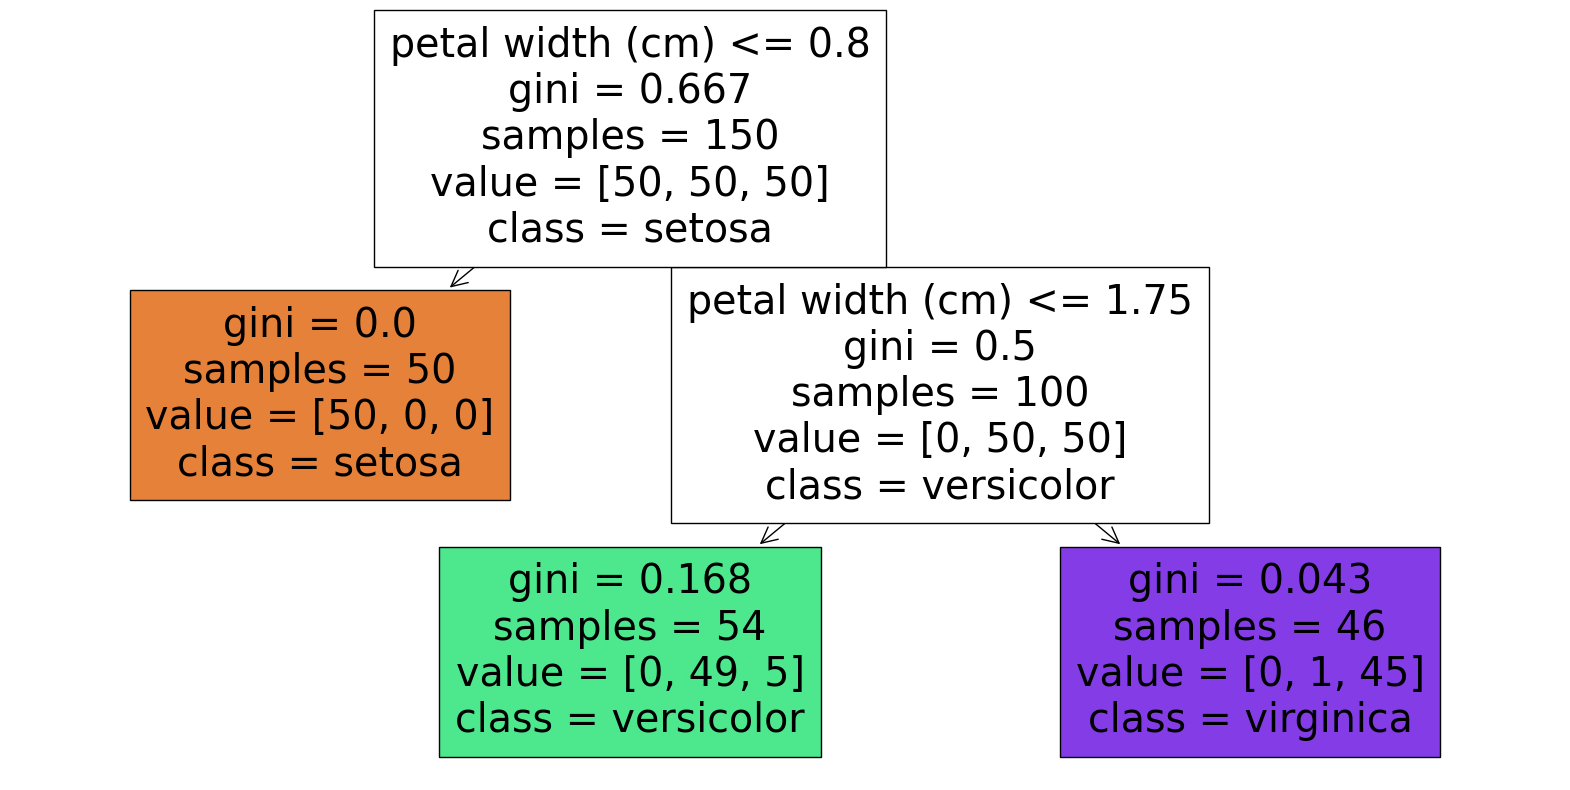

In [ ]:
# DT모델 생성 및 학습
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X,y)

# DT 시각화
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Iris 데이터 셋 로드
iris = datasets.load_iris()
X= iris.data
y= iris.target

# 훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# 의사결정나무 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Confusion_Matrix 계산
conf_matrix = confusion_matrix(y_test,y_pred)

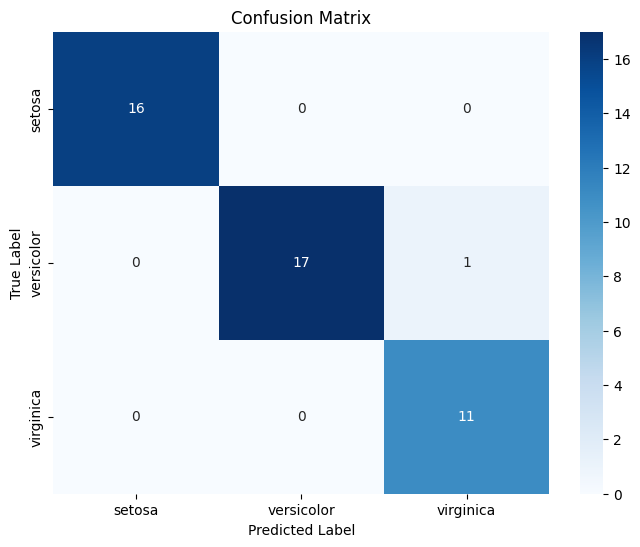

In [ ]:
# Confusion_Matrix 시각화
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# SVM
마진 최대화

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# Iris 데이터 셋 로드
iris = datasets.load_iris()
X= iris.data[:,:2] # 처음 두개의 특성만 사용
y= iris.target

# 훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# SVM 모델 생성 및 학습
model = SVC(kernel='linear', C=1.0, random_state=0)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# 테스트 데이터에 대한 예측 수행 및 정확도 계산
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.80


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
# 정확도, 혼동행렬, 정밀도, 재현율, F1 점수 계산
accuray = accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='macro')
recall=recall_score(y_test,y_pred, average='macro')
f1=f1_score(y_test,y_pred, average='macro')

print(f'Model accuray:{accuray:.2f}')
print(f'Precision:{precision:.2f}')
print(f'Recall:{recall:.2f}')
print(f'F1_score:{f1:.2f}')

Model accuray:0.80
Precision:0.78
Recall:0.79
F1_score:0.78


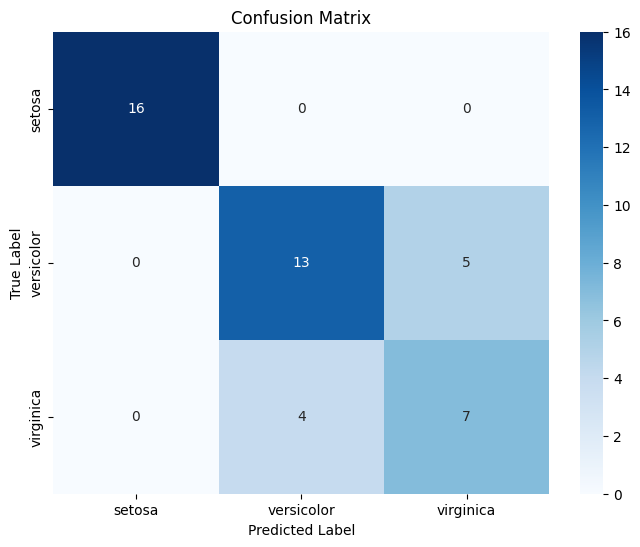

In [ ]:
#confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

#donfusion Matrix 시각화
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

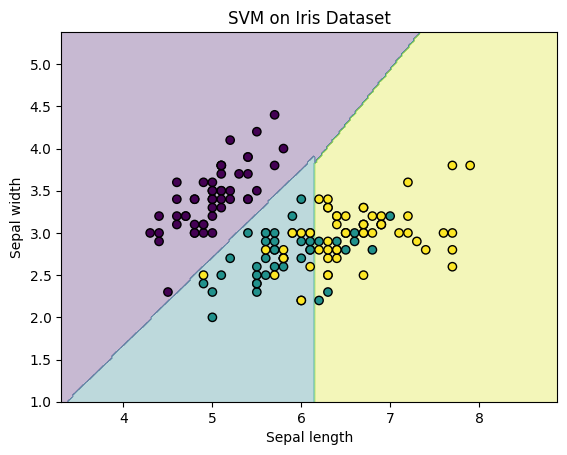

In [ ]:
# 시각화
x_min, x_max = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min,y_max,0.02))
Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(X[:,0],X[:,1],c=y,edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM on Iris Dataset')
plt.show()

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
# MNIST 데이터셋 로드
digits = datasets.load_digits()

# 데이터와 레이블 분리
X=digits.images.reshape((len(digits.images), -1))
y = digits.target

# 데이터를 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)

In [ ]:
#SVM 분류기 생성
clf = svm.SVC(gamma=0.001)

# 분류기 훈련
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
predicted = clf.predict(X_test)

# 모델 성능 평가
print(metrics.classification_report(y_test, predicted))

위에 컨퓨전 메트릭 방식으로 시각화하는 방법도 있다

#RF
랜덤 포레스트


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Iris 데이터 셋 로드
iris = datasets.load_iris()
X= iris.data[:,:2] # 처음 두개의 특성만 사용
y= iris.target

# 훈련 및 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# 랜덤 포레스트 모델 생성 및 학습
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
# 성능 지표 계산 및 출력
print("Random Forest Classification Report:")
print(classification_report(y_test,y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.64      0.39      0.48        18
           2       0.41      0.64      0.50        11

    accuracy                           0.67        45
   macro avg       0.66      0.68      0.65        45
weighted avg       0.69      0.67      0.66        45



#데이터 설명

캐글 데이터 첼린지 대회 비슷한거 기획 챌린지 공모전 데이콘 신약 계발 데이터 무슨 쥐랑 사람

SMILES데이터를 잘 분석 분자구조인데 이거 그려주는 패키지가 있음
나머지 여러개 뭐 농도비율 개수 결합수 질양 표면 합계 등 있음

아웃풋은 MLM,HLM

결측치가 있기때문에 EDA부터 해보시고 하나하나 배운거 스스로하기

In [ ]:
import pandas as pd
data=pd.read_csv("train_regression example.csv")
data
#data.shape

In [ ]:
data.isnull().sum()
#data.shape

In [ ]:
data = data.dropna()
data.isnull().sum()
#data.shape

In [ ]:
X = data.iloc[:, 4:11]
y1 = data.iloc[:, 2]
y2 = data.iloc[:, 3]
#data.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X=Scaler.fit_transform(X)
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# LinearRegression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 회귀 모델의 성능 평가
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1105.9057228720405


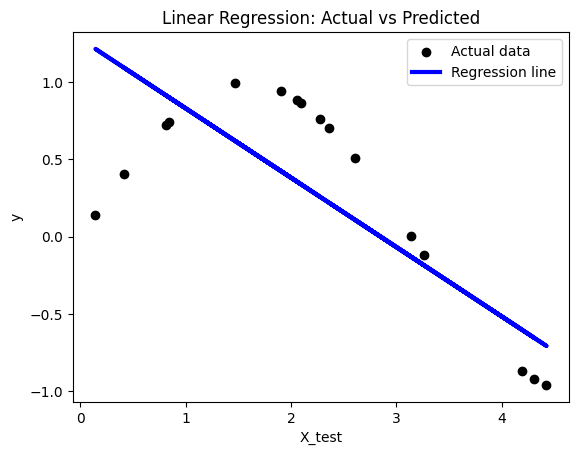

In [ ]:
# 테스트 데이터와 예측값 시각화
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()
plt.show()

# 데이터 분석 플로우를 한번 보겠습니다. 어떤 흐름인지
gpt로 도움을 받으면 좋음 , 첫번째로 데이터 확인, 데이터를 결측치 제거해주고,필요없는 1,2열 제거해주고, 기초통계량이라고하면 시각화 박스플랏 같은거 등 등 해주기.  스케일 이상치 덴서티 플랏같은 경우
회귀분석, 릿지 레그리션, 라소 레그리션 분석해야함 물론 트레인 테스트 해야함 7대3정도, svr,RF 클레스 파이어말고 랜덤 포레스트 리그래서 로도 할 수 있음 여기선 SVM이 아닌가보다.